<a href="https://colab.research.google.com/github/Annamjohn/Digit-Classification-using-Deep-Learning/blob/main/Digit%20Classification%20using%20VGG-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
import numpy as np
import random
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [6]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [7]:
# Load pre-trained VGG16 model without the top (classification) layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)



80134624/80134624 [==============================] - 1s 0us/step


In [8]:
# Create a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Reshape the images to fit VGG input dimensions
train_images_vgg = tf.image.grayscale_to_rgb(tf.image.resize(train_images, (48, 48)))
test_images_vgg = tf.image.grayscale_to_rgb(tf.image.resize(test_images, (48, 48)))

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(train_images_vgg, train_labels, epochs=1, batch_size=64, validation_data=(test_images_vgg, test_labels))

938/938 [==============================] - 2411s 3s/step - loss: 0.2272 - accuracy: 0.9330 - val_loss: 0.1235 - val_accuracy: 0.9588


In [11]:
test_loss, test_accuracy = model.evaluate(test_images_vgg, test_labels)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 337s 1s/step - loss: 0.1235 - accuracy: 0.9588
Test accuracy: 0.9588000178337097


1/1 [==============================] - 0s 70ms/step


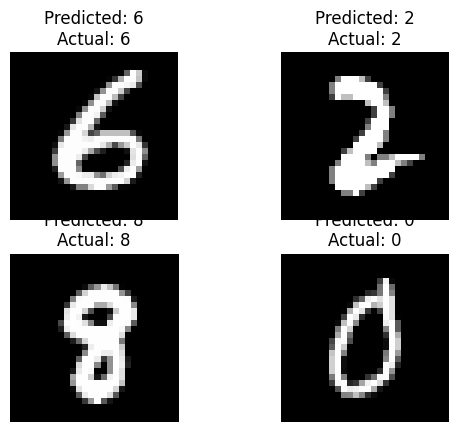

In [13]:
random_indices = random.sample(range(len(test_images)), 4)

# Iterate through the selected indices and display the images and predictions
for i, index in enumerate(random_indices):
    image = test_images[index].reshape(28, 28)  # Reshape back to 2D
    predicted_label = np.argmax(model.predict(tf.image.grayscale_to_rgb(tf.image.resize(np.expand_dims(test_images[index], axis=0), (48, 48)))))
    actual_label = np.argmax(test_labels[index])

    # Display the image
    plt.subplot(2, 2, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")
    plt.axis('off')

plt.show()
